# Khadija Amin

# LGMVIP Task2-Beginner level: Stock Market Prediction and Forecasting using Stacked LSTM

# Dataset link https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.preprocessing as sp
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [15]:
import pandas as pd
data=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv',index_col='Date')
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [16]:
# year range is from 2010-2018
data.tail()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


# Info about data

In [17]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [19]:
data.info

<bound method DataFrame.info of               Open    High     Low    Last   Close  Total Trade Quantity  \
Date                                                                       
2018-09-28  234.05  235.95  230.20  233.50  233.75               3069914   
2018-09-27  234.55  236.80  231.10  233.80  233.25               5082859   
2018-09-26  240.00  240.00  232.50  235.00  234.25               2240909   
2018-09-25  233.30  236.75  232.00  236.25  236.10               2349368   
2018-09-24  233.55  239.20  230.75  234.00  233.30               3423509   
...            ...     ...     ...     ...     ...                   ...   
2010-07-27  117.60  119.50  112.00  118.80  118.65                586100   
2010-07-26  120.10  121.00  117.10  117.10  117.60                658440   
2010-07-23  121.80  121.95  120.25  120.35  120.65                281312   
2010-07-22  120.30  122.00  120.25  120.75  120.90                293312   
2010-07-21  122.10  123.00  121.05  121.10  121.55      

In [22]:
data.shape

(2035, 7)

<AxesSubplot:xlabel='Date'>

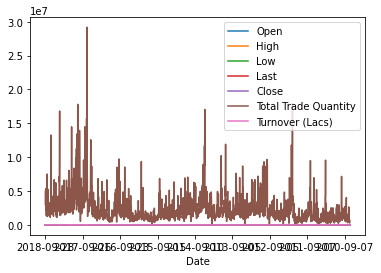

In [20]:
data.plot()

In [23]:
data.Close.value_counts()

155.55    6
154.85    6
141.90    6
147.65    5
140.80    5
         ..
124.95    1
124.40    1
119.25    1
118.05    1
116.60    1
Name: Close, Length: 1313, dtype: int64

# Close values from 2010 to 2018

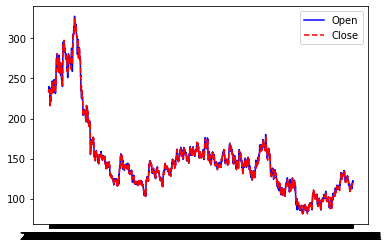

In [32]:
fig,axis=plt.subplots()
axis.plot(data['Open'],'-b',label='Open')
axis.plot(data['Close'],'--r',label='Close')
axis.legend()

# High vs Low Values

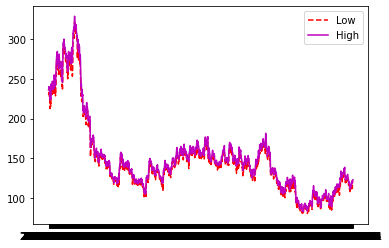

In [31]:
fig,axis=plt.subplots()
axis.plot(data['Low'],'--r',label='Low')
axis.plot(data['High'],'-m',label='High')
axis.legend()

# Preprocessing

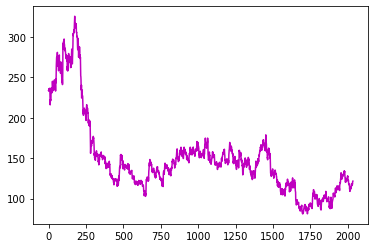

In [104]:
da=data.reset_index()['Close']
da=da.values
import matplotlib.pyplot as plt
plt.plot(da,'-m')

# Scaling

In [122]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
da=scaler.fit_transform(np.array(da).reshape(-1,1))
da

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

# splitting dataset into train and test split

In [123]:
train_size=int(len(da)*0.7)
test_size=len(da)-training_size
train_data,test_data=da[0:train_size,:],da[train_size:len(da),:1]

In [124]:
# training and testing size
train_size,test_size

(1424, 611)

In [127]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [129]:
# reshape into X=t,t+1,t+2..t+89 and Y=t+90
time_step = 90
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [130]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Create the Stacked LSTM model

In [131]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [132]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(90,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [133]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 90, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 90, 50)            20200     
                                                                 
 lstm_4 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [134]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 28s 711ms/step - loss: 0.0238 - val_loss: 0.0065
Epoch 2/100
21/21 [==============================] - 6s 287ms/step - loss: 0.0036 - val_loss: 0.0011
Epoch 3/100
21/21 [==============================] - 6s 263ms/step - loss: 0.0016 - val_loss: 8.2020e-04
Epoch 4/100
21/21 [==============================] - 6s 280ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 5/100
21/21 [==============================] - 6s 280ms/step - loss: 0.0014 - val_loss: 9.2010e-04
Epoch 6/100
21/21 [==============================] - 6s 264ms/step - loss: 0.0013 - val_loss: 8.5340e-04
Epoch 7/100
21/21 [==============================] - 6s 272ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 8/100
21/21 [==============================] - 6s 275ms/step - loss: 0.0012 - val_loss: 8.2769e-04
Epoch 9/100
21/21 [==============================] - 6s 291ms/step - loss: 0.0011 - val_loss: 8.2788e-04
Epoch 10/100
21/21 [==============================] - 6s 271ms/step - 

In [136]:
# Make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

17/17 [==============================] - 1s 54ms/step


In [137]:
# Inverse transform the predictions to get original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([ytest])

# Calculate root mean squared error for training and testing

In [138]:
trainScore = np.sqrt(np.mean((trainPredict - y_train[0]) ** 2))
testScore = np.sqrt(np.mean((testPredict - ytest[0]) ** 2))
print('Train RMSE: %.2f' % trainScore)
print('Test RMSE: %.2f' % testScore)

Train RMSE: 162.86
Test RMSE: 107.77


# Plot the predicted values

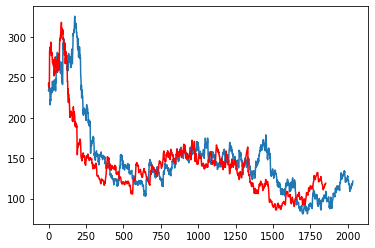

In [142]:
plt.plot(scaler.inverse_transform(da))
plt.plot(np.concatenate([trainPredict, testPredict]), color='red')
plt.show()

# Plot the predicted vs Actual values

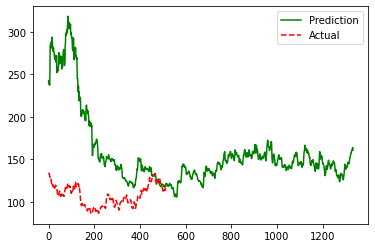

In [150]:
fig,ax=plt.subplots()
ax.plot(trainPredict,'-g',label='Prediction')
ax.plot(testPredict,'--r',label='Actual')
leg=ax.legend()